In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/language_translation/europarl-v10.fr-en.tsv', sep='\t', on_bad_lines='skip')
print(df)


<ipython-input-3-5e77313da52f>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/language_translation/europarl-v10.fr-en.tsv', sep='\t', on_bad_lines='skip')


                                                        4.  \
0        Ratification et mise en œuvre des conventions ...   
1                                                       7.   
2        Agriculture durable et biogaz: nécessité de re...   
3                    - Avant le vote sur le paragraphe 41:   
4        rapporteur. - (EN) Monsieur le Président, nous...   
...                                                    ...   
1909947                                  Le vote est clos.   
1909948  Chers collègues, il y a cinquante explications...   
1909949                   Vous savez ce que cela signifie.   
1909950  Je serai très rapide, je vous interromprai à l...   
1909951  Veuillez m'en excuser, mais nous devons respec...   

                                                      4..1  \
0        The ratification and implementation of the upd...   
1                                                       7.   
2        Sustainable agriculture and biogas: review of ...   
3      

In [ ]:
df.head()

,4.,4..1,ep-09-11-26-008-04.txt,008-04,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Ratification et mise en œuvre des conventions ...,The ratification and implementation of the upd...,ep-09-11-26-008-04.txt,008-04,NaN,NaN,NaN,NaN
1,7.,7.,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
2,Agriculture durable et biogaz: nécessité de re...,Sustainable agriculture and biogas: review of ...,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
3,- Avant le vote sur le paragraphe 41:,- Before the vote on paragraph 41:,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
4,"rapporteur. - (EN) Monsieur le Président, nous...","rapporteur. - Mr President, we agreed to chang...",ep-08-03-12-005-07.txt,005-07,101,Csaba Sándor Tabajdi,NaN,NaN


In [ ]:
df.shape

(1909952, 8)

In [ ]:
df.rename(columns={'4.': 'fr', '4..1': 'en'}, inplace=True)

In [ ]:
df.head()

,fr,en,ep-09-11-26-008-04.txt,008-04,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Ratification et mise en œuvre des conventions ...,The ratification and implementation of the upd...,ep-09-11-26-008-04.txt,008-04,NaN,NaN,NaN,NaN
1,7.,7.,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
2,Agriculture durable et biogaz: nécessité de re...,Sustainable agriculture and biogas: review of ...,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
3,- Avant le vote sur le paragraphe 41:,- Before the vote on paragraph 41:,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
4,"rapporteur. - (EN) Monsieur le Président, nous...","rapporteur. - Mr President, we agreed to chang...",ep-08-03-12-005-07.txt,005-07,101,Csaba Sándor Tabajdi,NaN,NaN


In [ ]:
data=df[['fr','en']]

In [ ]:
data.head()

,fr,en
0,Ratification et mise en œuvre des conventions ...,The ratification and implementation of the upd...
1,7.,7.
2,Agriculture durable et biogaz: nécessité de re...,Sustainable agriculture and biogas: review of ...
3,- Avant le vote sur le paragraphe 41:,- Before the vote on paragraph 41:
4,"rapporteur. - (EN) Monsieur le Président, nous...","rapporteur. - Mr President, we agreed to chang..."


In [ ]:
data.isnull().sum()

fr    2767
en    1948
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

fr    0
en    0
dtype: int64

In [ ]:
type(len(data['fr'][1]))

int

In [ ]:
data.shape[0]

1905237

In [ ]:
data.head()

,fr,en
0,Ratification et mise en œuvre des conventions ...,The ratification and implementation of the upd...
1,7.,7.
2,Agriculture durable et biogaz: nécessité de re...,Sustainable agriculture and biogas: review of ...
3,- Avant le vote sur le paragraphe 41:,- Before the vote on paragraph 41:
4,"rapporteur. - (EN) Monsieur le Président, nous...","rapporteur. - Mr President, we agreed to chang..."


In [ ]:
def contains_alphabetic(cell):
  return any(char.isalpha() for char in str(cell))

In [ ]:
contains_alphabetic(data['en'][1])

False

In [ ]:
for i in data['en']:
  if contains_alphabetic(i)==False:
    index_to_drop= data[data['en'] == i].index
    data = data.drop(index_to_drop)

In [ ]:
data.head()

,fr,en
0,Ratification et mise en œuvre des conventions ...,The ratification and implementation of the upd...
2,Agriculture durable et biogaz: nécessité de re...,Sustainable agriculture and biogas: review of ...
3,- Avant le vote sur le paragraphe 41:,- Before the vote on paragraph 41:
4,"rapporteur. - (EN) Monsieur le Président, nous...","rapporteur. - Mr President, we agreed to chang..."
5,"Le texte est le suivant: ""Propose l'insertion ...",The text is as follows: 'Proposes the comprehe...


In [ ]:
data.shape

(1900385, 2)

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

In [ ]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-fr"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
data['en'][0]

'The ratification and implementation of the updated ILO conventions (vote)'

In [ ]:
max_input_length = 128
max_target_length = 128

In [ ]:
type(data['en'][0])

str

In [ ]:
data.shape

(1900385, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_df.head()

,fr,en
1593270,Telle sera ma priorité principale.,This will be my main priority.
841369,Un déficit budgétaire de ce genre est défendab...,Such a budget deficit is defensible in the lon...
1336695,Nous pouvons également exprimer cette solidari...,We can also express solidarity by supporting t...
1897102,Elle concerne également la surveillance et vou...,It is about whether it is impossible to implem...
781745,Nous votons en faveur de la résolution.,We vote in favour of the resolution.


In [ ]:
val_df.head()

,fr,en
941137,"Pendant ce temps, nous allons causer un dommag...",In the mean time we are going to do huge econo...
1760482,"Je connais la fréquence de vos rencontres, des...",I am kept informed of the frequency of your me...
632979,"Mais nous-mêmes, nous n'avons pas consenti aut...","We, however, have not shown the same level of ..."
70023,"Comme le sait l'Assemblée, le Parlement europé...","As this House is aware, Parliament made its de..."
407316,"(DE) Le projet définitif d'ordre du jour, comm...",The final version of the draft agenda as drawn...


In [ ]:
tokenizer(["Hello, this is a sentence!", "This is another sentence."])

{'input_ids': [[10537, 2, 67, 32, 15, 5776, 145, 0], [160, 32, 1036, 5776, 3, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [ ]:
data['fr'][0]

"Ratification et mise en œuvre des conventions de l'OIT mises à jour (vote)"

In [ ]:
tokenizer(data['fr'][0])

{'input_ids': [48364, 11, 782, 51, 23, 49, 11700, 6020, 158, 13, 3838, 5, 14, 6, 839, 2558, 782, 114, 17, 49, 10243, 24, 4994, 1167, 28, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
import torch

In [ ]:
input_text = "This is a test sentence."

inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True).to('cpu')

with torch.no_grad():
    outputs = model.generate(**inputs)


translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Original text: {input_text}")
print(f"Translated text: {translated_text}")


Original text: This is a test sentence.
Translated text: C'est une phrase d'essai.


In [ ]:
inputs_train = tokenizer(train_df['en'].tolist(),max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")
inputs_val = tokenizer(val_df['en'].tolist(),max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")

In [ ]:
with tokenizer.as_target_tokenizer():
        labels_train = tokenizer(train_df['fr'].tolist(), max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")
        labels_val = tokenizer(val_df['fr'].tolist(), max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
input_inputs_train = inputs_train['input_ids']
input_masks_train = inputs_train['attention_mask']
output_labels_train=labels_train['input_ids']
output_masks_train = labels_train['attention_mask']
input_inputs_val = inputs_val['input_ids']
input_masks_val = inputs_val['attention_mask']
output_labels_val=labels_val['input_ids']
output_masks_val = labels_val['attention_mask']

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.optim as optim

In [ ]:
batch_size = 16

train_data_t = TensorDataset(input_inputs_train, input_masks_train, output_labels_train, output_masks_train)
train_sampler = RandomSampler(train_data_t)
train_dataloader = DataLoader(train_data_t, sampler=train_sampler, batch_size=batch_size)

val_data_t = TensorDataset(input_inputs_val, input_masks_val, output_labels_val, output_masks_val)
val_sampler = RandomSampler(val_data_t)
val_dataloader = DataLoader(val_data_t, sampler=val_sampler, batch_size=batch_size)

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
num_encoder_layers = len(model.model.encoder.layers)
num_decoder_layers = len(model.model.decoder.layers)

print(f'Number of encoder layers: {num_encoder_layers}')
print(f'Number of decoder layers: {num_decoder_layers}')

Number of encoder layers: 6
Number of decoder layers: 6


In [ ]:
N = 5  
for param in model.model.encoder.layers[:N]:
    for param in param.parameters():
        param.requires_grad = False

for param in model.model.decoder.layers[:N]:
    for param in param.parameters():
        param.requires_grad = False

In [ ]:
for i, layer in enumerate(model.model.encoder.layers[:6]):
    for param in layer.parameters():
        print(f"Encoder Layer {i} parameter requires_grad: {param.requires_grad}")


Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer

In [ ]:
import numpy as np

model.train()
model = model.to(device)
epochs=[]
loss_values=[]
for epoch in range(5):
    total_loss=0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels, b_label_mask  = batch
        optimizer.zero_grad()

        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_epoch_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {avg_epoch_loss:.4f}')

Epoch 1, Loss: 0.2680
Epoch 2, Loss: 0.2590
Epoch 3, Loss: 0.2554
Epoch 4, Loss: 0.2528
Epoch 5, Loss: 0.2509


In [ ]:
torch.save(model.state_dict(), 'model_weights_en-fr_1.pth')

In [ ]:
epochs=[1,2,3,4,5]

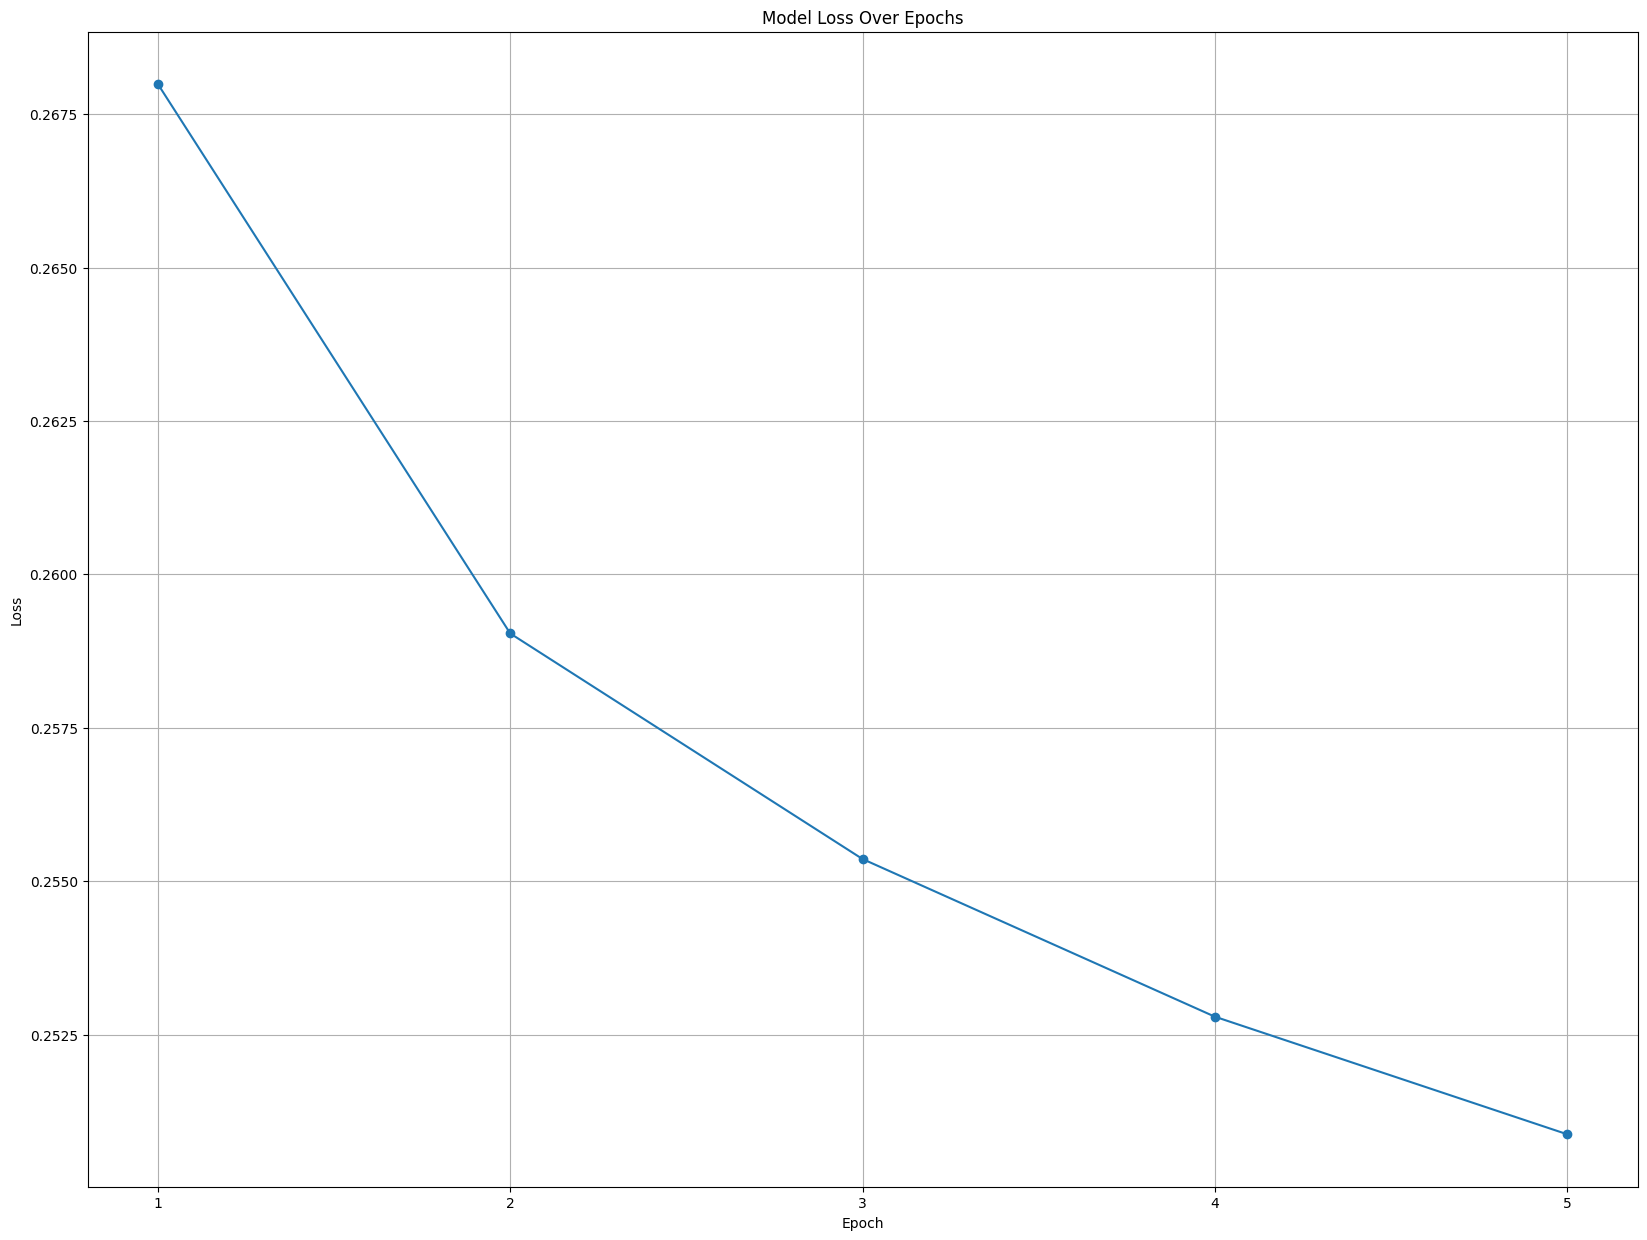

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(epochs, loss_values, marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [1]:
def validate_model(model, validation_dataloader, device):
    model.eval()
    total_val_loss = 0
    references = []
    hypotheses = []
    smoothie = SmoothingFunction().method4  

    with torch.no_grad():
        for step, batch in enumerate(validation_dataloader):
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels, b_label_mask = batch

            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            total_val_loss += loss.item()

            
            generated_ids = model.generate(
                input_ids=b_input_ids,
                attention_mask=b_input_mask,
                max_length=128, 
                num_beams=2,
                early_stopping=True
            )

            for i in range(len(generated_ids)):
                pred_sentence = generated_ids[i].tolist()
                true_sentence = b_labels[i][b_label_mask[i] == 1].tolist()

                hypotheses.append(pred_sentence)
                references.append([true_sentence])

    avg_val_loss = total_val_loss / len(validation_dataloader)
    print(f'Validation Loss: {avg_val_loss:.4f}')
    
    bleu_score = np.mean([sentence_bleu(ref, hyp, smoothing_function=smoothie) for ref, hyp in zip(references, hypotheses)])
    print(f'BLEU Score: {bleu_score:.4f}')

    return avg_val_loss, bleu_score

validation_loss, bleu_score = validate_model(model, val_dataloader, device)


Validation Loss: 3.1017
BLEU Score: 0.0189
